# Decision Tree Regression

In this notebook, we will demonstrate how to build a decision tree regression model to predict the birthtweight of babies using the [US births 2014](https://www.openintro.org/data/index.php?data=births14) dataset.

`Note`: remember the first step is EDA. Even though its not performed in this notebook doesn’t imply that it isn’t needed. The EDA was excluded to focus on the ML task.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('births14.csv')
df.head(10)

,fage,mage,mature,weeks,premie,visits,gained,weight,lowbirthweight,sex,habit,marital,whitemom
0,34.0,34,younger mom,37,full term,14.0,28.0,6.96,not low,male,nonsmoker,married,white
1,36.0,31,younger mom,41,full term,12.0,41.0,8.86,not low,female,nonsmoker,married,white
2,37.0,36,mature mom,37,full term,10.0,28.0,7.51,not low,female,nonsmoker,married,not white
3,NaN,16,younger mom,38,full term,NaN,29.0,6.19,not low,male,nonsmoker,not married,white
4,32.0,31,younger mom,36,premie,12.0,48.0,6.75,not low,female,nonsmoker,married,white
5,32.0,26,younger mom,39,full term,14.0,45.0,6.69,not low,female,nonsmoker,married,white
6,37.0,36,mature mom,36,premie,10.0,20.0,6.13,not low,female,nonsmoker,married,white
7,29.0,24,younger mom,40,full term,13.0,65.0,6.74,not low,male,nonsmoker,not married,white
8,30.0,32,younger mom,39,full term,15.0,25.0,8.94,not low,female,nonsmoker,married,white
9,29.0,26,younger mom,39,full term,11.0,22.0,9.12,not low,male,nonsmoker,not married,not white


In [3]:
#remove na values
df.dropna(inplace=True)


In [4]:
#encode the categorical feature
df = pd.get_dummies(df, drop_first=True) #drop one of the encoded gender columns

In [5]:
X   = df[['fage', 'mage', 'weeks', 'visits', 'gained', 'habit_smoker']] #get the input features
y   = df['weight']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )

In [6]:
dt = DecisionTreeRegressor(random_state=7)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=7)

In [7]:
#predict the labels for the test set
y_pred   = dt.predict(X_test)

print('The predicted birth weight is: {}'.format(y_pred))

The predicted birth weight is: [ 6.03  6.44  7.87  6.49  7.37  7.84  6.69  4.85  7.81  6.32  7.74  6.94
  8.19  8.88  5.91  7.5   7.12  5.06  8.75  5.47  9.68  8.19  8.6   8.16
  7.98  5.69  6.81  6.69  8.31  6.32  5.5   8.25  5.56  8.25  8.87  7.69
  9.24  7.13  5.5   7.13  6.44  7.13  8.31  8.75  6.32  7.34  7.81  5.13
  5.81  7.25 10.13  8.5   8.62  6.44  5.81  8.56  6.5   6.57  7.75  6.5
  6.88  5.89  6.32  5.75  6.25  6.89  9.    6.72  8.61  7.78  8.14  5.81
  9.63  9.39  8.87  9.25  7.09  5.88  6.19  5.11  8.75  7.81  7.56  7.5
  7.87  7.56  6.33  5.82  4.85  7.39  7.47  7.19  6.69  8.12  9.68  7.87
  6.94  7.09  8.31  5.99  8.28  6.53  5.93  9.19  5.68  6.75  6.92  6.13
  9.19  7.13  7.19  7.63  7.75  8.07  8.7   4.85  6.06  6.94  7.01  7.67
  7.81  8.27  6.69  8.54  8.88  6.94  8.5   7.75  7.25  8.54  8.25  6.93
  4.31  7.75  9.    4.38  6.96  5.81  8.    8.11  9.    7.54  7.75  9.24
  8.81  5.51  7.59  7.87  7.56  6.56  8.07  7.45  7.84  8.5   6.21  6.06
  6.83  7.13  7.94  8.

In [8]:
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 2.0518025104602513


## Lets compare the results with K-nn Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

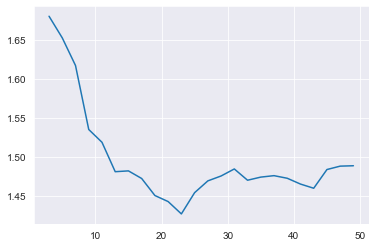

In [9]:
from sklearn.neighbors import KNeighborsRegressor

#identify a suitable value of k
predictions = {}

for k in range(3, 50, 2): #increment k by 2
    knn = KNeighborsRegressor(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    predictions[k] = mean_squared_error(y_test, y_pred_knn)
    
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.show()    

The knn models have a lower prediction error than the decision tree model. Does this mean its a better model or do we need to optimize our decision tree?